In [1]:
from itertools import combinations_with_replacement
from functools import reduce
from IPython.display import display

from sympy import *
init_printing()

In [2]:
t, k = symbols('t, k', real=True)
p, q, r = (u(t) for u in symbols('p, q, r', cls=Function))

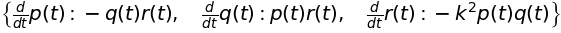

In [3]:
eqs = {\
p.diff(t): -q*r,\
q.diff(t): p*r,\
r.diff(t): -k**2*p*q,\
}
eqs

In [4]:
def undetermined_coeff(f, d):
    global inv, Cs
    inv, Cs = 0, []
    for i in combinations_with_replacement(range(1 + len(f)), d):
        if sum(i) > 0:
            s = "c" + "".join(str(p) for p in i if p)
            Cs.append(symbols(s, real=True))
            globals()[s] = Cs[-1]
            inv += Cs[-1]*reduce(lambda x, y: x*y,\
                                 (f[p-1] if p else 1 for p in i))
def remove_factor(r):
    lst = []
    for i in r:
        if i.func != Mul:
            lst.append(i)
        else:
            lst.append(i.func(*(1 if a in (k,) or \
                (a.func == Pow and a.args[0] in (k,))\
                else a for a in i.args)))
    return lst

def to_eqs(inv):
    lst = []
    def to_eqs1(r, f):
        if r:
            if not f:
                lst.append(r.factor())
            else:
                deg = r.as_poly(f[0]).degree()
                for i in range(deg+1):
                    to_eqs1(r.coeff(f[0], i), f[1:])
    to_eqs1(inv, pqr)
    return remove_factor(lst)

def to_sol(sol):
    r = []
    for i in Cs:
        if sol.coeff(i):
            r.append(sol.coeff(i).factor())    
    return remove_factor(r)

# degree == 2

In [5]:
pqr = [p, q, r]
undetermined_coeff(pqr, 2)
inv

In [6]:
inv1 = inv.diff(t).subs(eqs)
inv1

In [7]:
inv2 = to_eqs(inv1)
inv2

In [8]:
sol1 = solve(inv2, Cs)
sol1

In [9]:
invsol1 = inv.subs(sol1).expand()
invsol1

In [10]:
invs1 = to_sol(invsol1)
invs1

In [11]:
for i in invs1:
    print(i.diff(t).subs(eqs).expand(), end = " ")

0 0 

# degree == 4

In [12]:
undetermined_coeff(pqr, 4)
inv

In [13]:
inv1 = inv.diff(t).subs(eqs)
inv1

In [14]:
inv2 = to_eqs(inv1)
inv2

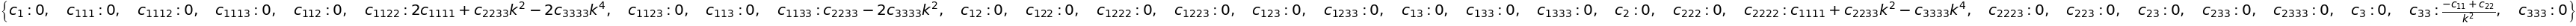

In [15]:
sol1 = solve(inv2, Cs)
sol1

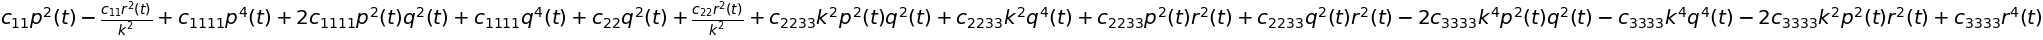

In [16]:
invsol1 = inv.subs(sol1).expand()
invsol1

In [17]:
invs1 = to_sol(invsol1)
invs1

In [18]:
for i in invs1:
    print(i.diff(t).subs(eqs).expand(), end = " ")

0 0 0 0 0 